# Modeling: Loan Application Approval
### Comparison of Classification Algorithms Performance Metrics 

In [15]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /Users/Reeves1/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38h50d1736_0         3.1 MB  conda-forge
    imbalanced-learn-0.8.0     |     pyhd8ed1ab_0         109 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.8.0-pyhd8ed1ab_0

The following packages will be UPDATED:

  conda                               4.10.0-py38h50d1736_1 --> 4.10.1-py38h50d1736_0



conda-4.10.1         | 3.1 MB    | ##################################### | 100% 
imbalanced-learn-0.8 | 109 KB    | ##################################### | 100% 
P

#### In this notebook I will recreate my baseline model, utilizing a 70/30 train-test split, and attempt to boost the recall score of the minority class via oversampling and undersampling as a method of accounting for the imbalanced classes. I will also utilize a Random Forest, and Decision Tree algorithm to compare performance metrics for each on the training data once it has been oversampled and undersampled. 

In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df_clean = pd.read_csv('data/loan_data_clean.csv')

In [7]:
del df_clean['ApplicantIncome']
del df_clean['Loan_ID']
del df_clean['CoapplicantIncome']

In [9]:
dummy_df = df_clean[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'HouseholdIncome']]

In [10]:
X = pd.get_dummies(dummy_df)
y = df_clean['Loan_Status'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1, stratify=y)

In [12]:
#construct Logistic Regression model
clf = LogisticRegression(max_iter=1000)
#fit the model on the training data
clf.fit(X_train, y_train)
#introduce variable to be reused later 
y_predict_test = clf.predict(X_test)

In [13]:
y_predict_training = clf.predict(X_train)
print("[Training Classification Report]")
print(classification_report(y_train, y_predict_training))

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

           N       0.88      0.43      0.58       134
           Y       0.79      0.97      0.87       295

    accuracy                           0.80       429
   macro avg       0.83      0.70      0.73       429
weighted avg       0.82      0.80      0.78       429

[Test Classification Report]
              precision    recall  f1-score   support

           N       1.00      0.40      0.57        58
           Y       0.78      1.00      0.88       127

    accuracy                           0.81       185
   macro avg       0.89      0.70      0.72       185
weighted avg       0.85      0.81      0.78       185



## Logistic Regression
#### Oversampling the minority class will be the first step in attempting to improve the recall of the baseline model. 

In [18]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [26]:
#construct Logistic Regression model
clf = LogisticRegression(max_iter=1000)
#fit the model on the training data
clf.fit(X_resampled, y_resampled)
#introduce variable to be reused later 
y_predict_test = clf.predict(X_test)

In [21]:
y_predict_training = clf.predict(X_resampled)
print("[Training Classification Report]")
print(classification_report(y_resampled, y_predict_training))

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

           N       0.50      0.74      0.60       295
           Y       0.51      0.27      0.35       295

    accuracy                           0.50       590
   macro avg       0.50      0.50      0.48       590
weighted avg       0.50      0.50      0.48       590

[Test Classification Report]
              precision    recall  f1-score   support

           N       0.27      0.55      0.36        58
           Y       0.60      0.31      0.41       127

    accuracy                           0.38       185
   macro avg       0.43      0.43      0.38       185
weighted avg       0.50      0.38      0.39       185



#### The performance metrics for the baseline model after being oversampled for the minority class performs better in the training Classification report for recall increasing from .43 to .74. We see an increase in recall in the Test set as well, however, in both models the Precision score of the Majority Class is significantly worse. I am curious to see how SMOTE affects the recall score of this model. 

In [22]:
from imblearn.over_sampling import SMOTE

In [53]:
X_resampled1, y_resampled1 = SMOTE().fit_resample(X_train, y_train)
#construct Logistic Regression model
clf = LogisticRegression(max_iter=1000)
#fit the model on the training data
clf.fit(X_resampled1, y_resampled1)
#introduce variable to be reused later 
y_predict_test = clf.predict(X_test)
y_predict_training = clf.predict(X_resampled1)
print("[Training Classification Report]")
print(classification_report(y_resampled1, y_predict_training))

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

           N       0.85      0.73      0.78       295
           Y       0.76      0.87      0.81       295

    accuracy                           0.80       590
   macro avg       0.81      0.80      0.80       590
weighted avg       0.81      0.80      0.80       590

[Test Classification Report]
              precision    recall  f1-score   support

           N       0.55      0.53      0.54        58
           Y       0.79      0.80      0.80       127

    accuracy                           0.72       185
   macro avg       0.67      0.67      0.67       185
weighted avg       0.72      0.72      0.72       185



In [60]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

SyntaxError: 'return' outside function (<ipython-input-60-ad7c7221856c>, line 5)

#### SMOTE provided interesting results! The recall metric in the Training set was significantly higher than the baseline model and the Precision score did not suffer any decline remaining at .79. Precision score for the minority class and recall for the majority class were decreased by .07 and .06 respectively. Performance on the test set was significantly worse than the training set, with the recall for the minority class seeing no improvement. Undersampling will be the final method I attempt on this baseline model.

In [24]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled2, y_resampled2 = rus.fit_resample(X_train, y_train)

In [118]:
#construct Logistic Regression model
clf = LogisticRegression(max_iter=1000)
#fit the model on the training data
clf.fit(X_resampled2, y_resampled2)
#introduce variable to be reused later 
y_predict_test = clf.predict(X_test)
y_predict_training = clf.predict(X_resampled2)
print("[Training Classification Report]")
print(classification_report(y_resampled2, y_predict_training))
LR_Report = classification_report(y_test, y_predict_test, output_dict=True)
print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

           N       0.74      0.67      0.71       134
           Y       0.70      0.77      0.73       134

    accuracy                           0.72       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.72      0.72      0.72       268

[Test Classification Report]
              precision    recall  f1-score   support

           N       0.49      0.60      0.54        58
           Y       0.80      0.71      0.75       127

    accuracy                           0.68       185
   macro avg       0.64      0.66      0.64       185
weighted avg       0.70      0.68      0.68       185



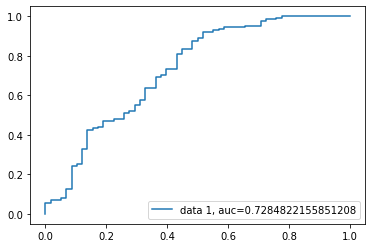

In [80]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Y')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Performance metrics for the minority class recall has seen the best improvement in the test set with an increase from .43 to .60, while simultaneously improving the precision of the majority class in the test set. There was a significant decrease in performance of the precision for the minority class in the test set that cannot be ignored, however. As we can see from the ROC/AUC metric, the model is decently performing, but far from optimized. At this point, I have achieved the goal of improving the recall score of the minority class by utilizing undersampling of the training set. Utilizing both oversampling and undersampling, as well as SMOTE on a Random Forest Algorithm will be my next step. 

## Random Forest 

#### ---Setting the number of trees to 10,000 as opposed to the default 100, may improve the performance of each Random Forest Model. 

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10000)
ros = RandomOverSampler()
X_resampled3, y_resampled3 = ros.fit_resample(X_train, y_train)
clf.fit(X_resampled3, y_resampled3)
y_predict_test = clf.predict(X_test)
y_predict_training = clf.predict(X_resampled3)

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Test Classification Report]
              precision    recall  f1-score   support

           N       0.68      0.55      0.61        58
           Y       0.81      0.88      0.85       127

    accuracy                           0.78       185
   macro avg       0.75      0.72      0.73       185
weighted avg       0.77      0.78      0.77       185



#### The training set results were perfect across the board for the Random Forest model, with the test set being significantly better than the oversampling results on the baseline Log. Regression model. It will be interesting to see the effects of SMOTE on this model as well! 

In [117]:
X_resampled4, y_resampled4 = SMOTE().fit_resample(X_train, y_train)
#construct Logistic Regression model
clf = RandomForestClassifier(n_estimators=10000)
#fit the model on the training data
clf.fit(X_resampled4, y_resampled4)
#introduce variable to be reused later 
y_predict_test = clf.predict(X_test)
y_predict_training = clf.predict(X_resampled4)
RF_report = classification_report(y_test, y_predict_test, output_dict=True)
print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Test Classification Report]
              precision    recall  f1-score   support

           N       0.70      0.52      0.59        58
           Y       0.80      0.90      0.85       127

    accuracy                           0.78       185
   macro avg       0.75      0.71      0.72       185
weighted avg       0.77      0.78      0.77       185



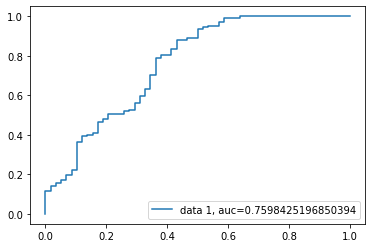

In [86]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Y')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Overall, this model performs marginally better on the test set than Random Oversampled model with the Precision scores of both classes increasing as well as the recall score of the Majority class. The recall for the minority class performed a little worse, by .02, in this model than the ROS. This AUC is a bit better at 75.9 compared to the Log. Reg. Undersampled Model, showing we are going in the right direction. 

In [83]:
rus = RandomUnderSampler()
X_resampled5, y_resampled5 = rus.fit_resample(X_train, y_train)
#construct Logistic Regression model
clf = RandomForestClassifier(n_estimators=10000)
#fit the model on the training data
clf.fit(X_resampled5, y_resampled5)
#introduce variable to be reused later 
y_predict_test = clf.predict(X_test)
y_predict_training = clf.predict(X_resampled5)

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Test Classification Report]
              precision    recall  f1-score   support

           N       0.51      0.59      0.54        58
           Y       0.80      0.74      0.77       127

    accuracy                           0.69       185
   macro avg       0.65      0.66      0.66       185
weighted avg       0.71      0.69      0.70       185



#### Comparing the recall and precision scores for the ROS, RUS, and SMOTE resampling for the Random Forest Model, I believe the best model would be the SMOTE resampled Random Forest. This model performs better than the baseline model as well! Looking at how another algorithm performs will be valuable as well. 

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf = DecisionTreeClassifier()
ros = RandomOverSampler()
X_resampled6, y_resampled6 = ros.fit_resample(X_train, y_train)
clf.fit(X_resampled6, y_resampled6)
y_predict_test = clf.predict(X_test)
y_predict_training = clf.predict(X_resampled6)

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Test Classification Report]
              precision    recall  f1-score   support

           N       0.58      0.52      0.55        58
           Y       0.79      0.83      0.81       127

    accuracy                           0.73       185
   macro avg       0.68      0.67      0.68       185
weighted avg       0.72      0.73      0.73       185



#### It appears as though the Decision Tree Classifier performance after ROS is closer to the results we saw from the Log. Reg. Model, that being it is not quite as good as the Random Forest Model. 

In [45]:
X_resampled7, y_resampled7 = SMOTE().fit_resample(X_train, y_train)
#construct Logistic Regression model
clf = DecisionTreeClassifier()
#fit the model on the training data
clf.fit(X_resampled7, y_resampled7)
#introduce variable to be reused later 
y_predict_test = clf.predict(X_test)
y_predict_training = clf.predict(X_resampled7)

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Test Classification Report]
              precision    recall  f1-score   support

           N       0.57      0.55      0.56        58
           Y       0.80      0.81      0.80       127

    accuracy                           0.73       185
   macro avg       0.68      0.68      0.68       185
weighted avg       0.73      0.73      0.73       185



#### We see a similar performance in this model with SMOTE resampling methods applied, marginally better than the baseline model, but not as good as the Random Forest Model. 

In [46]:
rus = RandomUnderSampler()
X_resampled8, y_resampled8 = rus.fit_resample(X_train, y_train)
#construct Logistic Regression model
clf = DecisionTreeClassifier()
#fit the model on the training data
clf.fit(X_resampled8, y_resampled8)
#introduce variable to be reused later 
y_predict_test = clf.predict(X_test)
y_predict_training = clf.predict(X_resampled8)

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Test Classification Report]
              precision    recall  f1-score   support

           N       0.39      0.52      0.45        58
           Y       0.74      0.64      0.69       127

    accuracy                           0.60       185
   macro avg       0.57      0.58      0.57       185
weighted avg       0.63      0.60      0.61       185



#### And with the RUS methods on the Decision Tree algorithm we see again that it is not nearly as effective as the Random Forest Model. 

#### While the models in general would need more optimization, overall the goal of improving the recall of the minority class has been best achieved by the Random Forest SMOTE model and the Log. Reg. Undersampled model. Ultimately, a clustering algorithm could be utilized to determine new information regarding some of the dependent variables and how they affect the target. For the purpose of this capstone, I am satisfied in how I have built these classification models and achieved some semblance of hyperparameter tuning to enhance the recall scores. 

In [132]:
RF_df = pd.DataFrame(RF_report)
LR_df = pd.DataFrame(LR_Report)
reports_df = [RF_df, LR_df]
df = pd.concat(reports_df).transpose()
df.columns = ['RF_Precision', 'RF_Recall', 'RF_f1', 'RF_support', 'LR_Precision', 'LR_Recall', 'LR_f1', 'LR_support']
df

,RF_Precision,RF_Recall,RF_f1,RF_support,LR_Precision,LR_Recall,LR_f1,LR_support
N,0.697674,0.517241,0.594059,58.000000,0.486111,0.603448,0.538462,58.000000
Y,0.802817,0.897638,0.847584,127.000000,0.796460,0.708661,0.750000,127.000000
accuracy,0.778378,0.778378,0.778378,0.778378,0.675676,0.675676,0.675676,0.675676
macro avg,0.750246,0.707440,0.720822,185.000000,0.641286,0.656055,0.644231,185.000000
weighted avg,0.769853,0.778378,0.768100,185.000000,0.699162,0.675676,0.683680,185.000000


#### As we can see in the table above, the RF model performs better in every metric except the minority class Recall. The decreased performance of that metric, combined with the increased precision of the same minority class compared to the minority class of the LR model justifies using the RF model instead of the LR model. 